In [32]:
import matplotlib.pyplot as plt
import numpy as np

# TASK 1

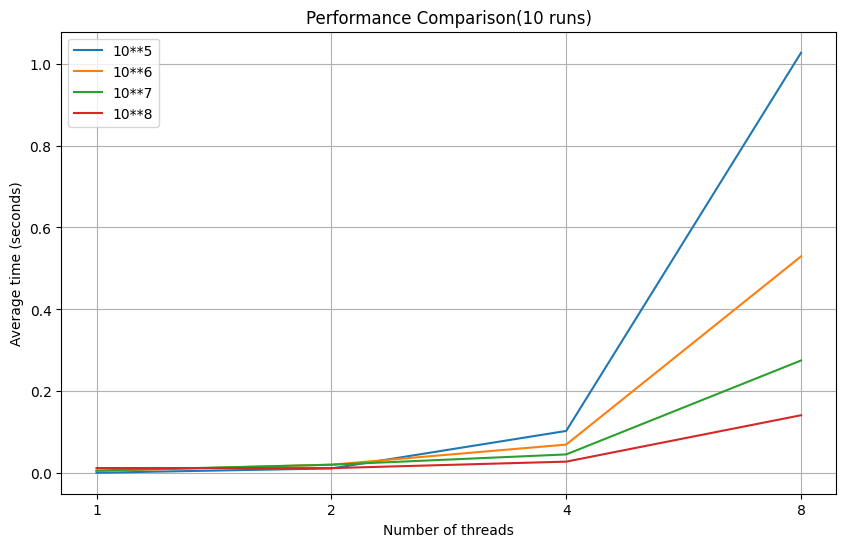

In [33]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

# Среднее время без редукции (в секундах)
time = [
    [
        0.00120763, 0.0116252, 0.103227, 1.02672  # Num cores: 1
    ],
    [
        0.00527453, 0.0208588, 0.0699427, 0.529491  # Num cores: 2
    ],
    [
        0.00657132, 0.0208052, 0.0459022, 0.275257  # Num cores: 4
    ],
    [
        0.0126469, 0.0124093, 0.0282681, 0.141566  # Num cores: 8
    ]
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')

ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison(10 runs)')
ax.legend()

plt.grid(True)
plt.show()


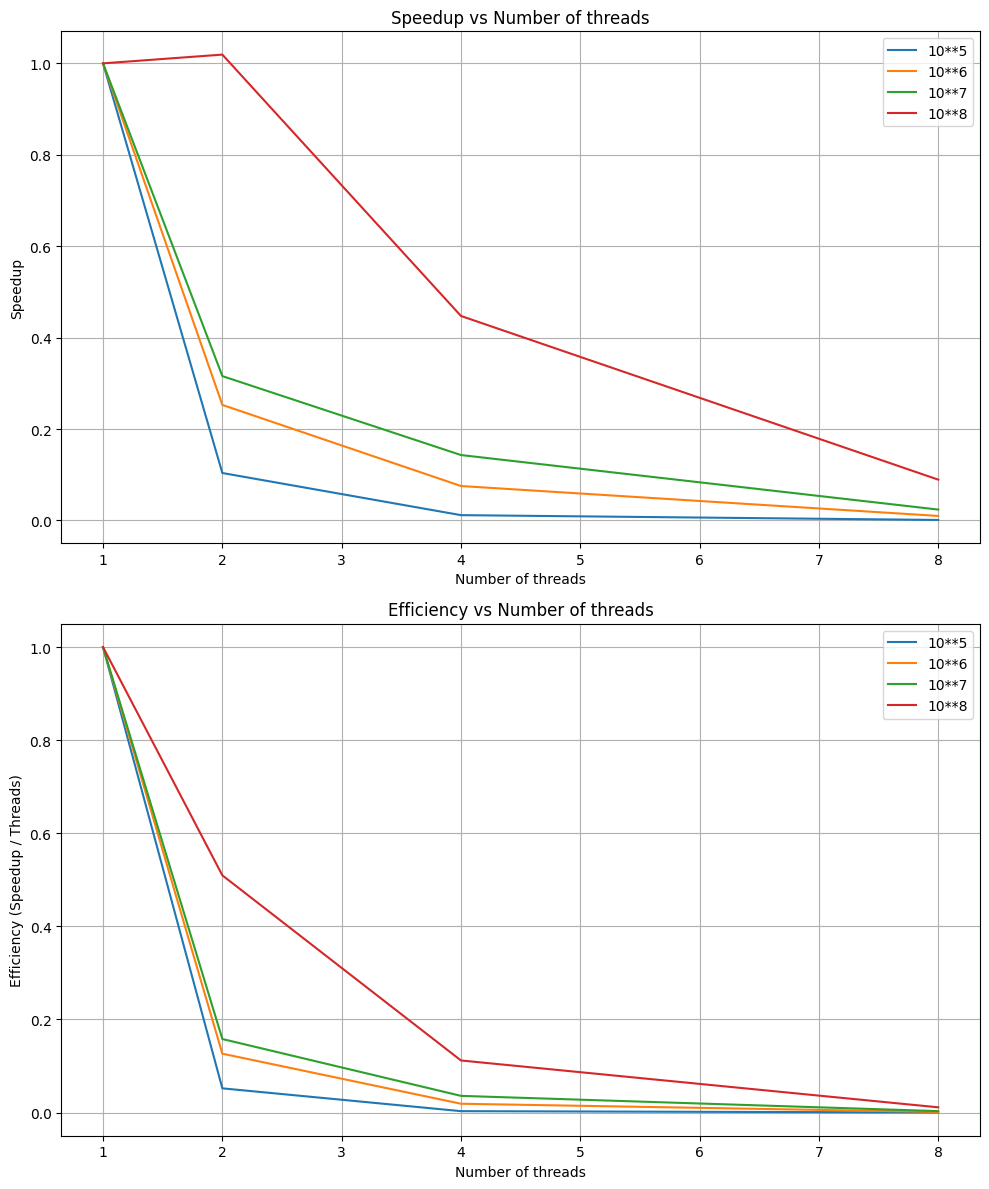

In [34]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup = []
num_threads = list(map(int, num_threads))
# Польза каждого ядра
efficiency = []

for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time = time[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup.append([base_time/ t for t in time[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'{size}')
    
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'{size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TASK 2 SCALAR

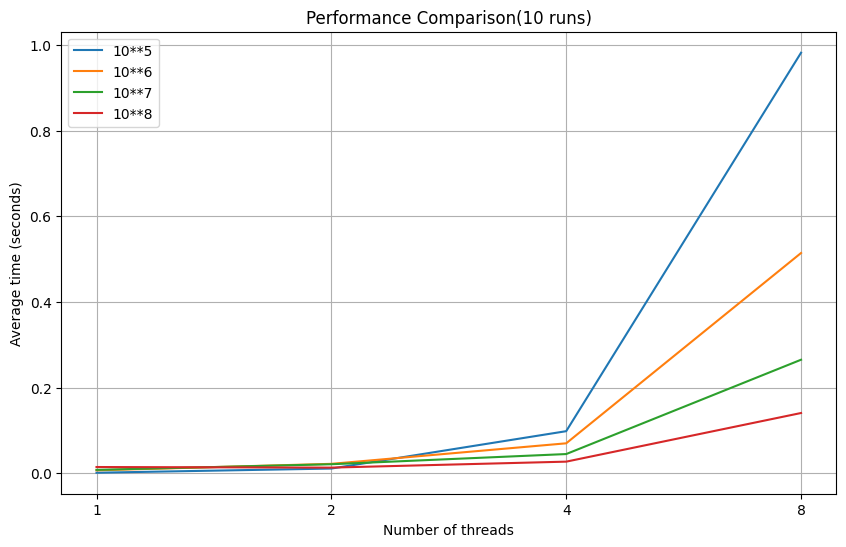

In [35]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

# Среднее время без редукции (в секундах)
time = [
    [
        0.0011232, 0.0108634, 0.0981158, 0.98178  # Num cores: 1
    ],
    [
        0.00669267, 0.0218631, 0.0697968, 0.514139  # Num cores: 2
    ],
    [
        0.00783197, 0.0209238, 0.0447167, 0.264945  # Num cores: 4
    ],
    [
        0.0144338, 0.0130653, 0.0269807, 0.140552  # Num cores: 8
    ]
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')

ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison(10 runs)')
ax.legend()

plt.grid(True)
plt.show()


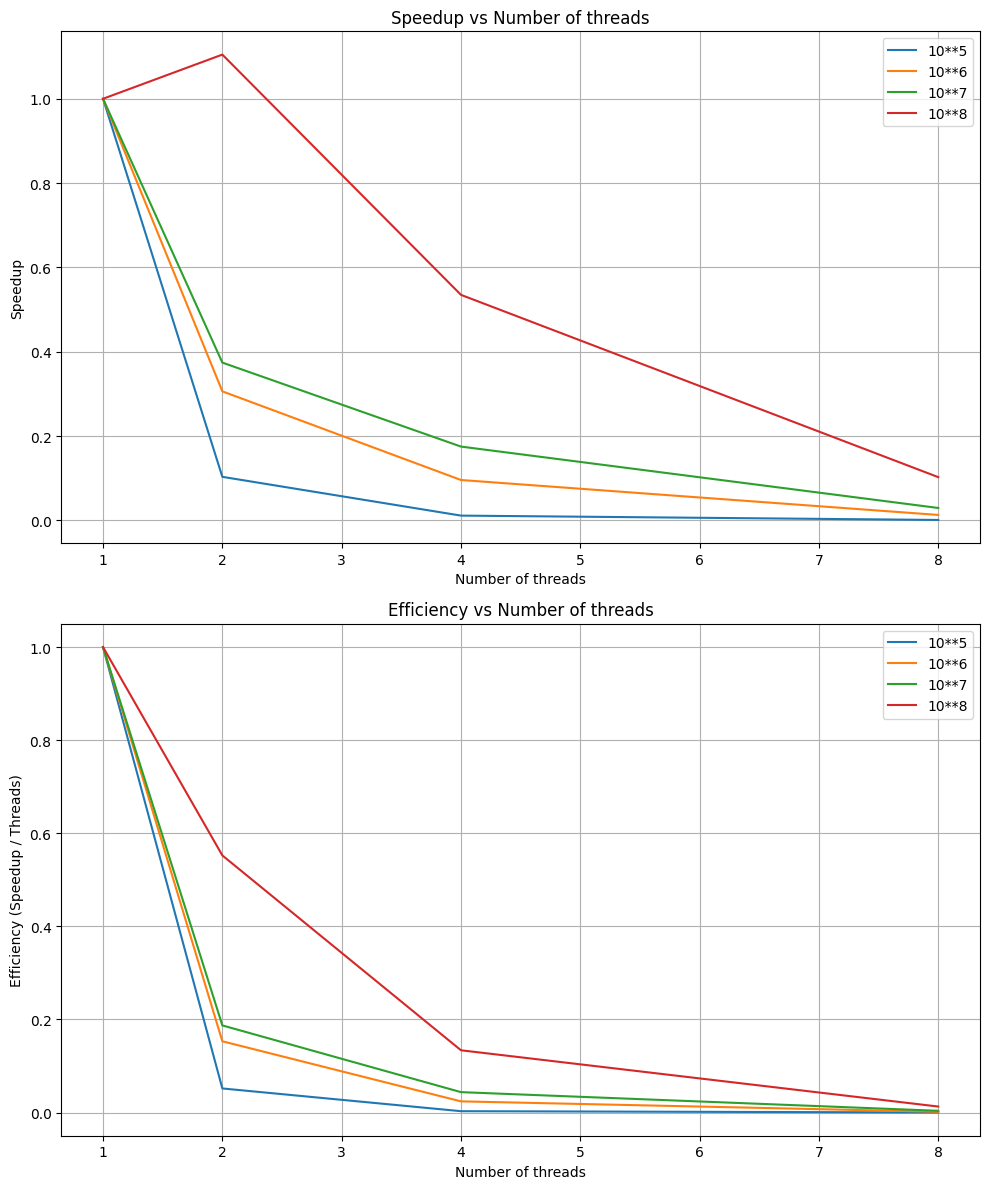

In [36]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup = []
num_threads = list(map(int, num_threads))
# Польза каждого ядра
efficiency = []

for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time = time[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup.append([base_time/ t for t in time[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'{size}')
    
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'{size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TASK 3 CONNECTIONS

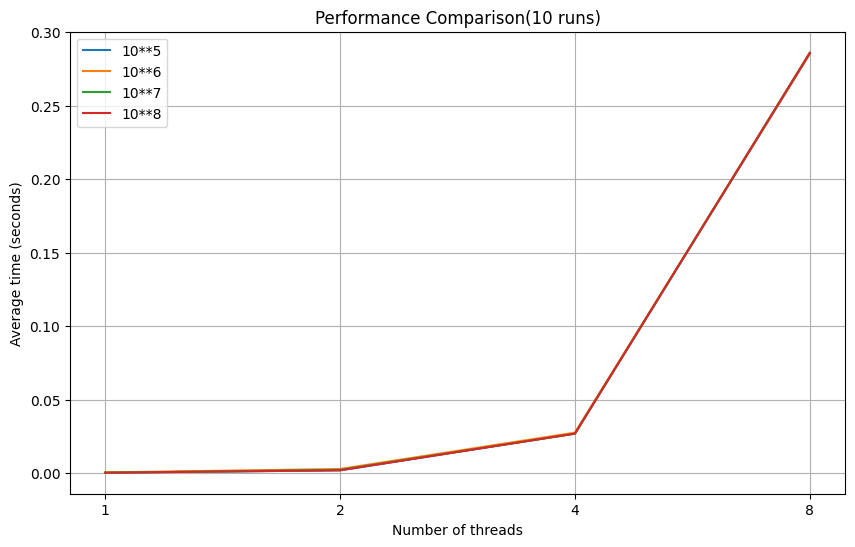

In [37]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

# Среднее время без редукции (в секундах)
time = [
    [
        0.000261709, 0.00183739, 0.0269003, 0.28533  # Num cores: 1
    ],
    [
        0.000409365, 0.00275279, 0.0274931, 0.285503  # Num cores: 2
    ],
    [
        0.000239973, 0.00220393, 0.026757, 0.286056  # Num cores: 4
    ],
    [
        0.000226428, 0.00188098, 0.0268702, 0.285931  # Num cores: 8
    ]
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')

ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison(10 runs)')
ax.legend()

plt.grid(True)
plt.show()

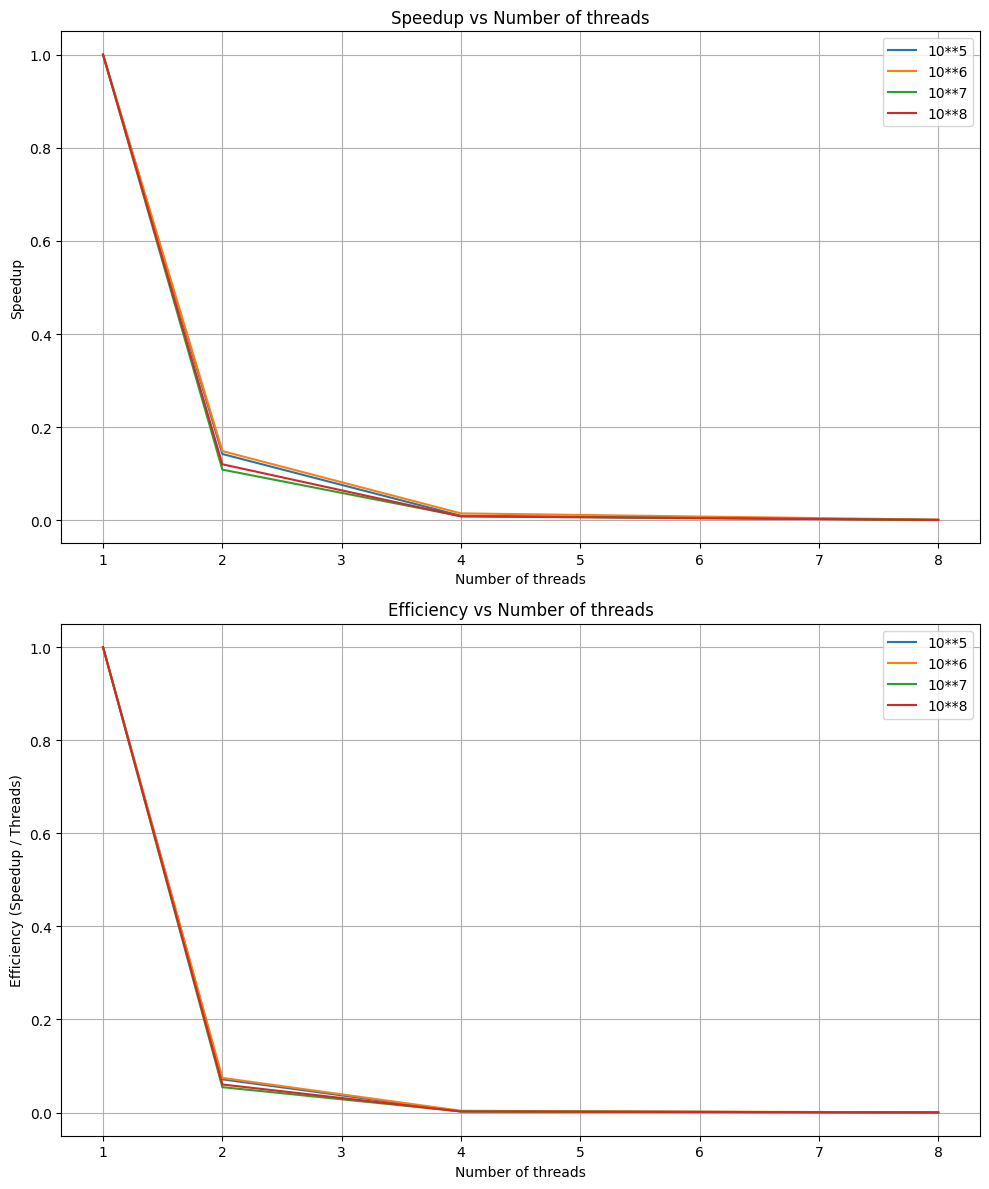

In [38]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup = []
num_threads = list(map(int, num_threads))
# Польза каждого ядра
efficiency = []

for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time = time[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup.append([base_time/ t for t in time[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'{size}')
    
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'{size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TASK 4 MATRIX MULTIPLICATION

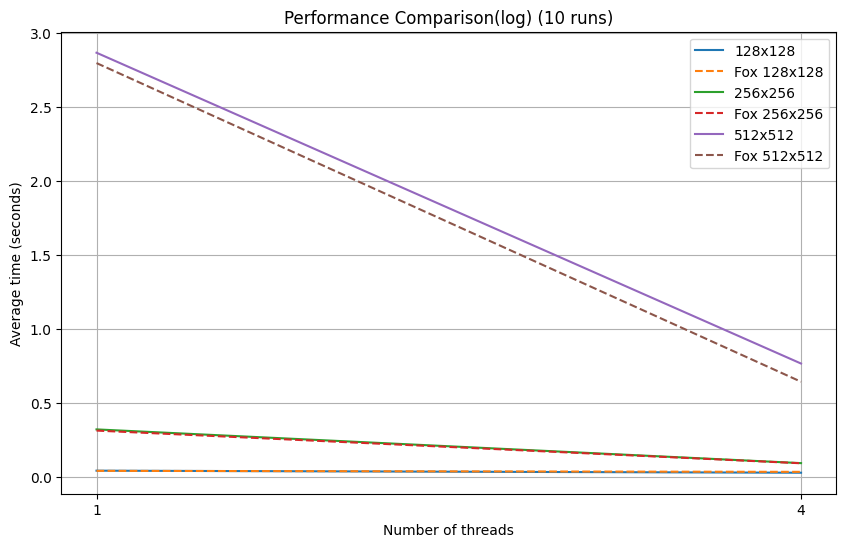

In [39]:
# Данные
data_sizes = ['128x128', '256x256', '512x512']
num_threads = ['1',"4"]

# Среднее время без редукции (в секундах)
time = [
    [0.040661, 0.0267859],  # Размер 128x128
    [0.319642, 0.0916226],  # Размер 256x256
    [2.86546, 0.764635]     # Размер 512x512
]

time_fox = [
    [0.0394147, 0.0326725], # Размер 128x128
    [0.311628, 0.0906655],  # Размер 256x256
    [2.7956, 0.641656]      # Размер 512x512
]
fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')
    ax.plot(num_threads, time_fox[i], label=f'Fox {size}', linestyle="--")
    
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison(log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


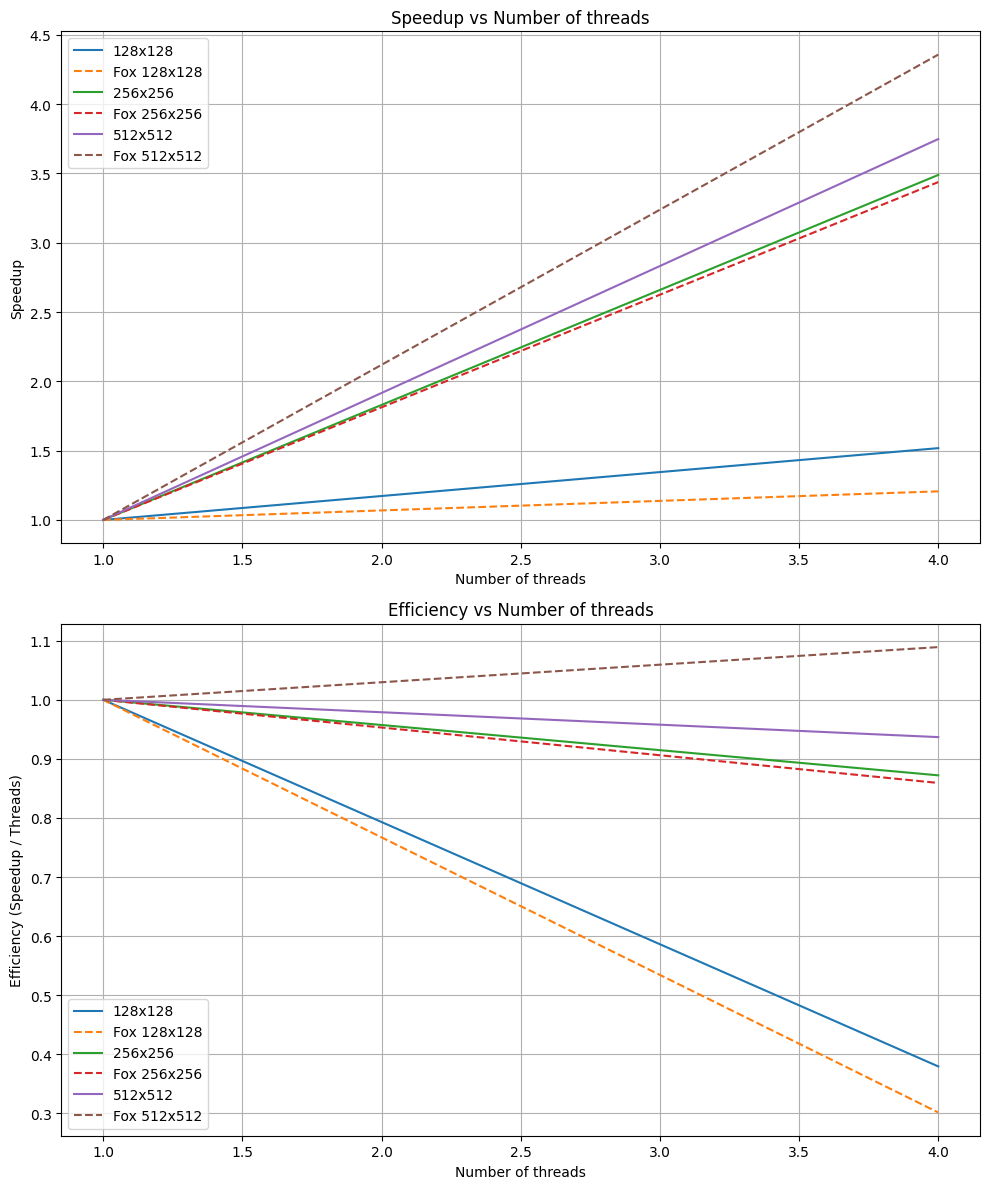

In [40]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup = []
num_threads = list(map(int, num_threads))
# Польза каждого ядра
efficiency = []

speedup_fox = []

efficiency_fox = []
for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time = time[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup.append([base_time/ t for t in time[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])
    
    base_time_fox = time_fox[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup_fox.append([base_time_fox/ t for t in time_fox[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency_fox.append([s / nt for s, nt in zip(speedup_fox[i], num_threads)])
# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'{size}')
    ax[0].plot(num_threads, speedup_fox[i], label=f'Fox {size}',  linestyle="--")
    
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'{size}')
    ax[1].plot(num_threads, efficiency_fox[i], label=f'Fox {size}',  linestyle="--")
    
ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TASK 5 COMMUNICATIONS

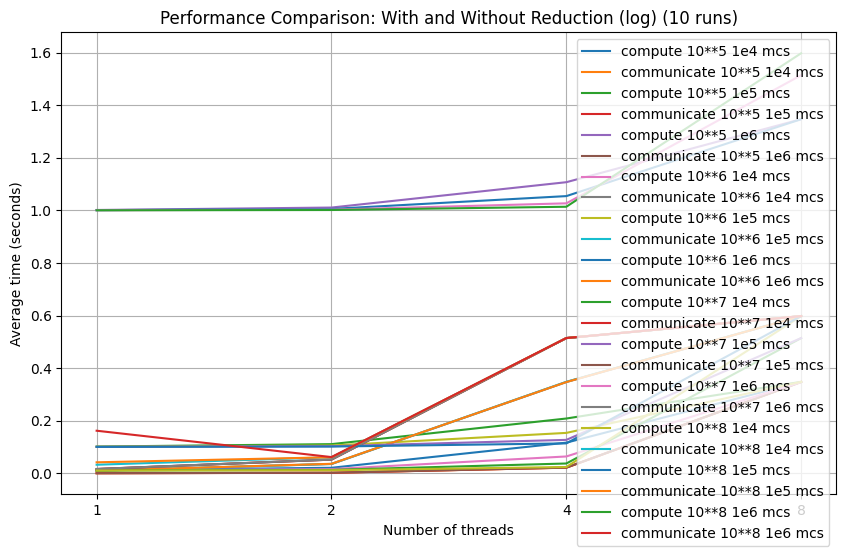

In [41]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

# Среднее время без редукции (в секундах)
time_compute1e4 = [
    [
        0.0114172, 0.0208102, 0.116406, 0.34721  # Num cores: 1
    ],
    [
        0.01075, 0.0157266, 0.0638926, 0.34721  # Num cores: 2
    ],
    [
        0.0104242, 0.0128694, 0.0371322, 0.514112  # Num cores: 4
    ],
    [
        0.0102654, 0.0114573, 0.0237565, 0.597711  # Num cores: 8
    ]
]

# Среднее время без редукции (в секундах)
time_communicate1e4 = [
    [
        0.000124236, 0.00177467, 0.021243, 0.34721  # Num cores: 1
    ],
    [
        0.00918748, 0.0351041, 0.34721, 0.597711  # Num cores: 2
    ],
    [
        0.0161375, 0.0518764, 0.514112, 0.597711  # Num cores: 4
    ],
    [
        0.0323942, 0.0609174, 0.514112, 0.597711  # Num cores: 8
    ]
]
time_compute1e5 = [
    [
        0.101558, 0.110775, 0.20823, 0.347751  # Num cores: 1
    ],
    [
        0.100857, 0.105492, 0.153538, 0.347751  # Num cores: 2
    ],
    [
        0.100491, 0.102847, 0.126972, 0.514308  # Num cores: 4
    ],
    [
        0.100321, 0.101537, 0.113592, 0.597993  # Num cores: 8
    ]
]

# Среднее время без редукции (в секундах)
time_communicate1e5 = [
    [
        0.000128943, 0.00173401, 0.0214096, 0.347751  # Num cores: 1
    ],
    [
        0.010062, 0.0354581, 0.347751, 0.597993  # Num cores: 2
    ],
    [
        0.0158359, 0.0518787, 0.514308, 0.597993  # Num cores: 4
    ],
    [
        0.0416677, 0.0608187, 0.514308, 0.597993  # Num cores: 8
    ]
]

time_compute1e6 = [
    [
        1.00154, 1.01079, 1.10723, 1.346882  # Num cores: 1
    ],
    [
        1.00085, 1.00553, 1.05433, 1.346882  # Num cores: 2
    ],
    [
        1.00047, 1.00281, 1.02682, 1.514325  # Num cores: 4
    ],
    [
        1.0003, 1.00149, 1.01381, 1.597864  # Num cores: 8
    ]
]

# Среднее время без редукции (в секундах)
time_communicate1e6 = [
    [
        0.000129028, 0.00202949, 0.0214758, 0.346882  # Num cores: 1
    ],
    [
        0.00992841, 0.0359401, 0.346882, 0.597864  # Num cores: 2
    ],
    [
        0.016266, 0.052306, 0.514325, 0.597864  # Num cores: 4
    ],
    [
        0.161805, 0.0615203, 0.514325, 0.597864  # Num cores: 8
    ]
]

fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_compute1e4[i], label=f'compute {size} 1e4 mcs')
    ax.plot(num_threads, time_communicate1e4[i], label=f'communicate {size} 1e4 mcs')
    ax.plot(num_threads, time_compute1e5[i], label=f'compute {size} 1e5 mcs')
    ax.plot(num_threads, time_communicate1e5[i], label=f'communicate {size} 1e5 mcs')    
    ax.plot(num_threads, time_compute1e6[i], label=f'compute {size} 1e6 mcs')
    ax.plot(num_threads, time_communicate1e6[i], label=f'communicate {size} 1e6 mcs')
    
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison: With and Without Reduction (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


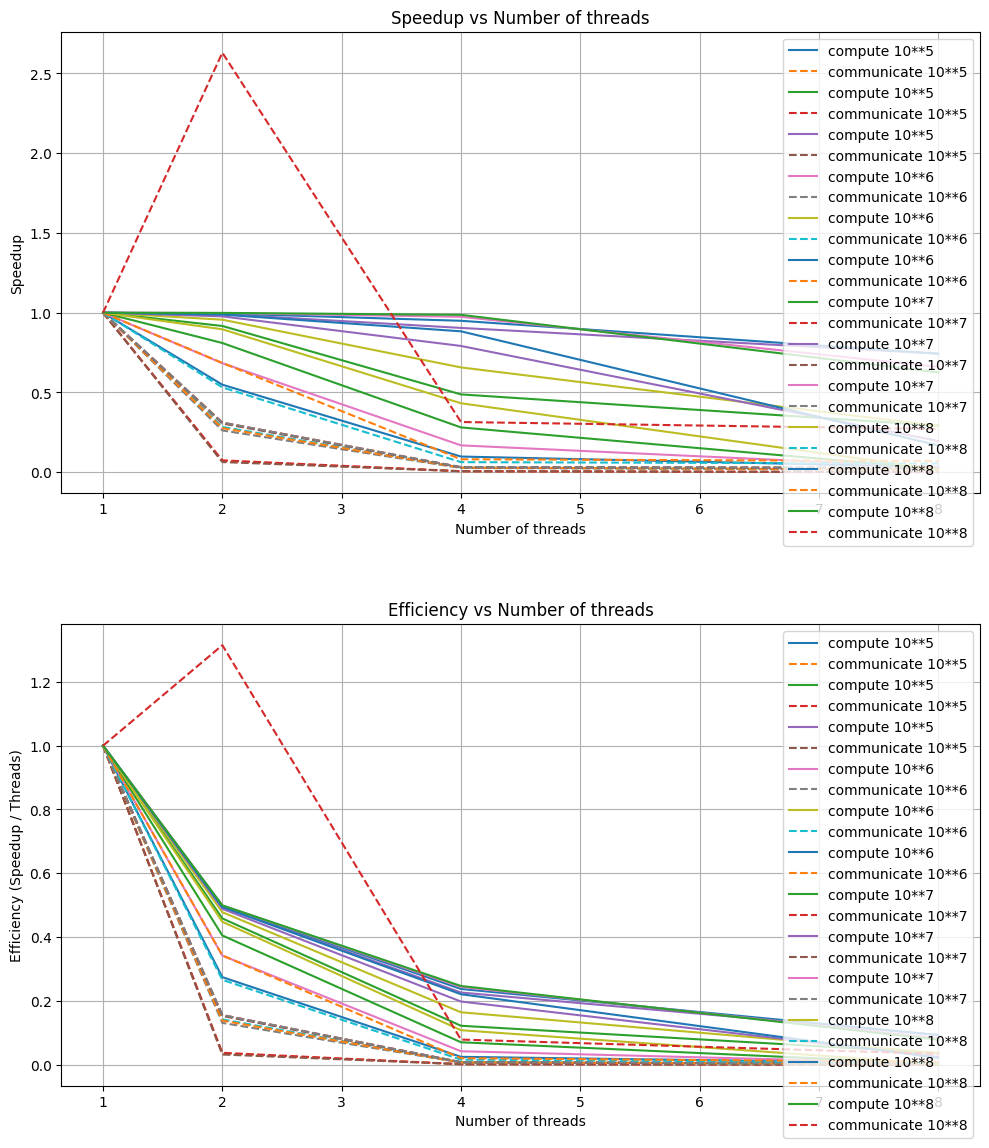

In [42]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
num_threads = list(map(int, num_threads))
speedup1 = []
# Польза каждого ядра
efficiency1 = []

speedup_fox1 = []

efficiency_fox1 = []

# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup2 = []
# Польза каждого ядра
efficiency2 = []

speedup_fox2 = []

efficiency_fox2 = []

# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup3 = []
# Польза каждого ядра
efficiency3 = []

speedup_fox3 = []

efficiency_fox3 = []

for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time1 = time_compute1e4[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup1.append([base_time1/ t for t in time_compute1e4[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency1.append([s / nt for s, nt in zip(speedup1[i], num_threads)])
    
    base_time_fox1 = time_communicate1e4[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup_fox1.append([base_time_fox1/ t for t in time_communicate1e4[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency_fox1.append([s / nt for s, nt in zip(speedup_fox1[i], num_threads)])
        # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time2 = time_compute1e5[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup2.append([base_time2/ t for t in time_compute1e5[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency2.append([s / nt for s, nt in zip(speedup2[i], num_threads)])
    
    base_time_fox2 = time_communicate1e5[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup_fox2.append([base_time_fox2/ t for t in time_communicate1e5[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency_fox2.append([s / nt for s, nt in zip(speedup_fox2[i], num_threads)])
        # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time3 = time_compute1e6[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup3.append([base_time3/ t for t in time_compute1e6[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency3.append([s / nt for s, nt in zip(speedup3[i], num_threads)])
    
    base_time_fox3 = time_communicate1e6[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup_fox3.append([base_time_fox3/ t for t in time_communicate1e6[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency_fox3.append([s / nt for s, nt in zip(speedup_fox3[i], num_threads)])
    
# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup1[i], label=f'compute {size}')
    ax[0].plot(num_threads, speedup_fox1[i], label=f'communicate {size}',  linestyle="--")
    ax[0].plot(num_threads, speedup2[i], label=f'compute {size}')
    ax[0].plot(num_threads, speedup_fox2[i], label=f'communicate {size}',  linestyle="--")
    ax[0].plot(num_threads, speedup3[i], label=f'compute {size}')
    ax[0].plot(num_threads, speedup_fox3[i], label=f'communicate {size}',  linestyle="--")
       
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency1[i], label=f'compute {size}')
    ax[1].plot(num_threads, efficiency_fox1[i], label=f'communicate {size}',  linestyle="--")
    ax[1].plot(num_threads, efficiency2[i], label=f'compute {size}')
    ax[1].plot(num_threads, efficiency_fox2[i], label=f'communicate {size}',  linestyle="--")
    ax[1].plot(num_threads, efficiency3[i], label=f'compute {size}')
    ax[1].plot(num_threads, efficiency_fox3[i], label=f'communicate {size}',  linestyle="--")
    
ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TASK 6 OPERATIONS

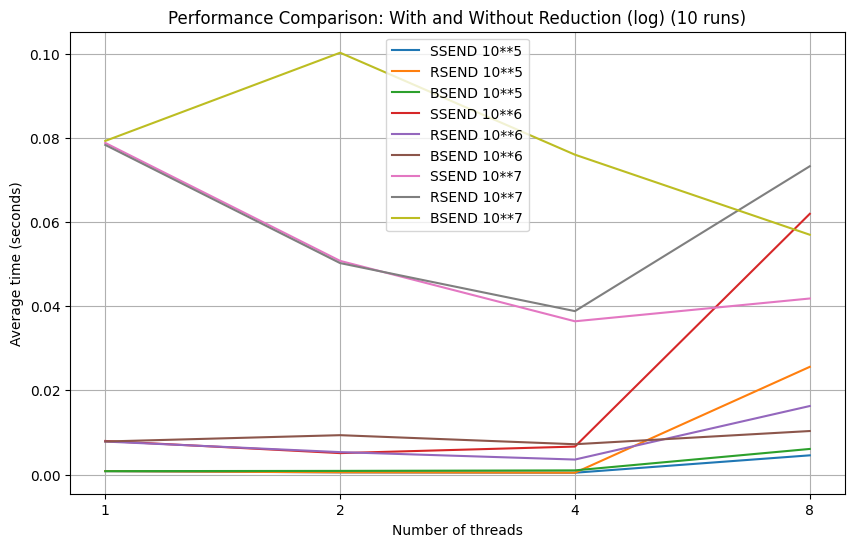

In [51]:
# Данные
data_sizes = ['10**5', '10**6', '10**7']
num_threads = ['1', '2', '4',"8"]

# Среднее время без редукции (в секундах)
time_1 = [
 [0.00080005, 0.00051229, 0.0004241 , 0.00455679],
 [0.00797634, 0.00508633, 0.00664184, 0.0619757 ],
 [0.0788335 , 0.0507864 , 0.0364266 , 0.041843  ]
]

time_2 = [
 [0.00081511, 0.0005238 , 0.00042796, 0.0255982 ],
 [0.00783427, 0.0053212 , 0.00355657, 0.016283  ],
 [0.0783561 , 0.0502618 , 0.0388418 , 0.0732891 ]
]
time_3 = [
 [0.00079771, 0.00085948, 0.00097949, 0.00607649],
 [0.00784366, 0.00934973, 0.00719832, 0.0103361 ],
 [0.0793058 , 0.100275  , 0.0760339 , 0.0570019 ]
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_1[i], label=f'SSEND {size}')
    ax.plot(num_threads, time_2[i], label=f'RSEND {size}')
    ax.plot(num_threads, time_3[i], label=f'BSEND {size}')
    
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison: With and Without Reduction (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


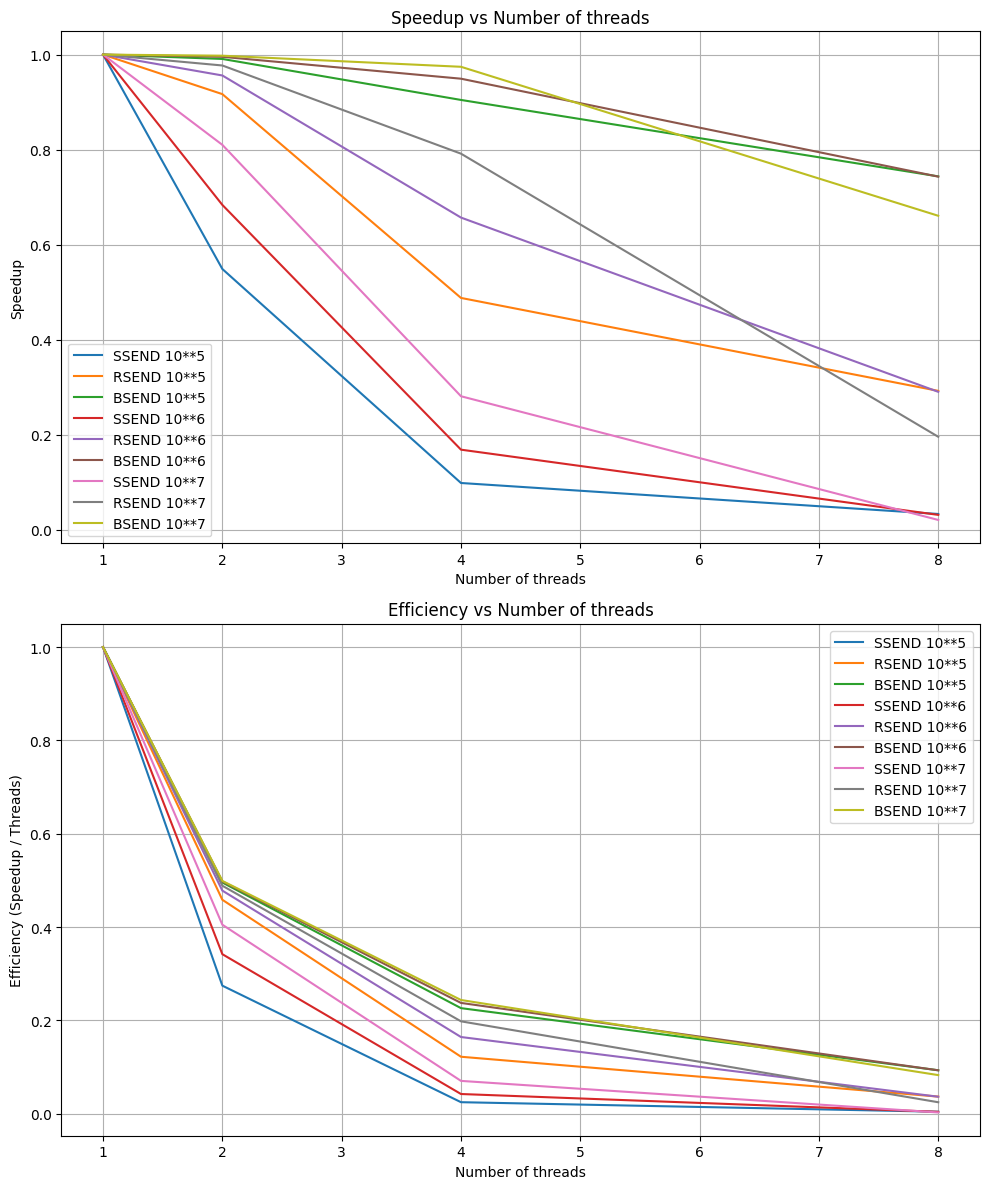

In [52]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
num_threads = list(map(int, num_threads))
speedup1 = []
# Польза каждого ядра
efficiency1 = []


# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup2 = []
# Польза каждого ядра
efficiency2 = []

# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup3 = []
# Польза каждого ядра
efficiency3 = []


for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time1 = time_compute1e4[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup1.append([base_time1/ t for t in time_compute1e4[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency1.append([s / nt for s, nt in zip(speedup1[i], num_threads)])
    
    base_time2 = time_compute1e5[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup2.append([base_time2/ t for t in time_compute1e5[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency2.append([s / nt for s, nt in zip(speedup2[i], num_threads)])
    
    base_time3 = time_compute1e6[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup3.append([base_time3/ t for t in time_compute1e6[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency3.append([s / nt for s, nt in zip(speedup3[i], num_threads)])
    
# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup1[i], label=f'SSEND {size}')
    ax[0].plot(num_threads, speedup2[i], label=f'RSEND {size}')
    ax[0].plot(num_threads, speedup3[i], label=f'BSEND {size}')
       
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency1[i], label=f'SSEND {size}')
    ax[1].plot(num_threads, efficiency2[i], label=f'RSEND {size}')
    ax[1].plot(num_threads, efficiency3[i], label=f'BSEND {size}')
    
ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TASK 7 LOCKER